## Surprise Housing Prediction using Linear, Ridge and Lasso Regression

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation


### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
# reading the dataset
housing = pd.read_csv("train.csv")

In [4]:
# summary of the dataset: 205 rows, 26 columns, no null values
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# head
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Understanding the Data Dictionary

The data dictionary contains the meaning of various attributes; some non-obvious ones are:

In [6]:
housing.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [7]:
housing.select_dtypes(include=['int64', 'float64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [8]:
# drivewheel: frontwheel, rearwheel or four-wheel drive 
housing['MSSubClass'].astype('category').value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

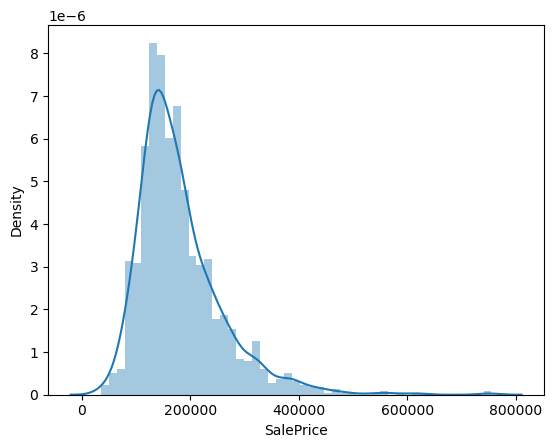

In [9]:
# wheelbase: distance between centre of front and rarewheels
sns.distplot(housing['SalePrice'])
plt.show()

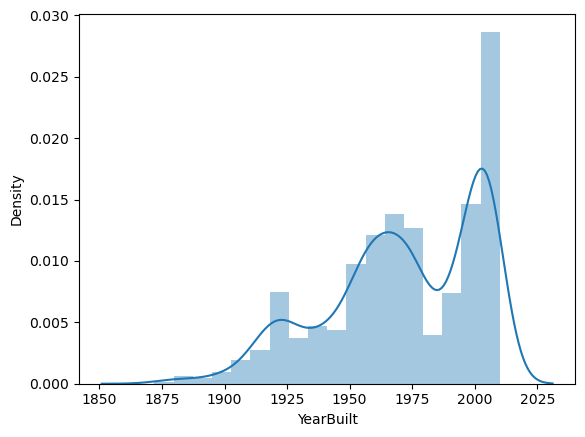

In [10]:
# curbweight: weight of car without occupants or baggage
sns.distplot(housing['YearBuilt'])
plt.show()

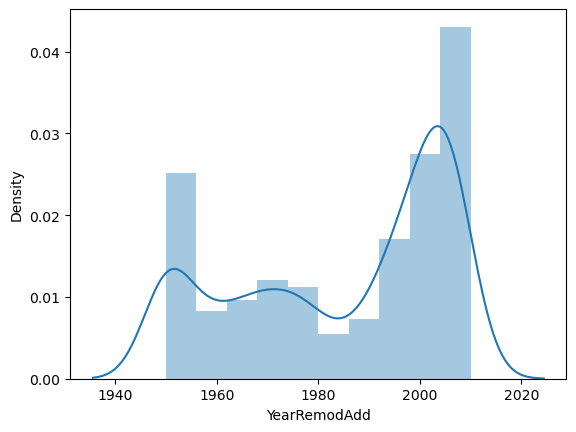

In [11]:
# stroke: volume of the engine (the distance traveled by the 
# piston in each cycle)
sns.distplot(housing['YearRemodAdd'])
plt.show()

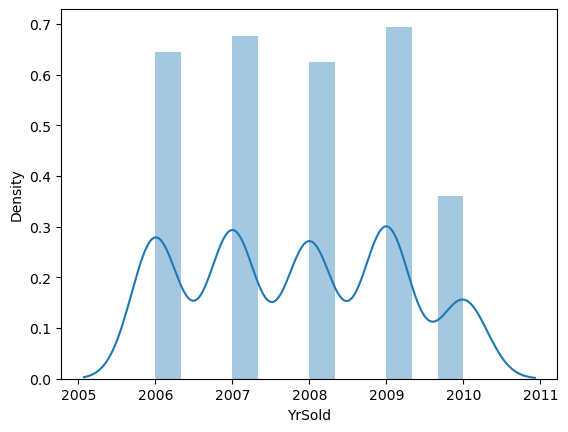

In [12]:
# compression ration: ratio of volume of compression chamber 
# at largest capacity to least capacity
sns.distplot(housing['YrSold'])
plt.show()

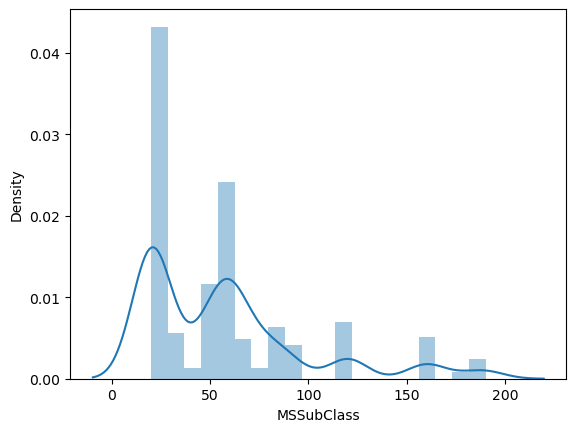

In [13]:
# target variable: price of car
sns.distplot(housing['MSSubClass'])
plt.show()

#### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

In [14]:
housing = housing.drop(columns=['Id'], axis = 1)

In [15]:
# all categorical (float and int) variables in the dataset
housing_categorical = housing.select_dtypes(include=['object'])
housing_categorical.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [16]:
# all numeric (float and int) variables in the dataset
housing_numeric = housing.select_dtypes(include=['float64', 'int64'])
housing_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


Here, although the variable ```symboling``` is numeric (int), we'd rather treat it as categorical since it has only 6 discrete values. Also, we do not want 'car_ID'.

In [17]:
# dropping symboling and car_ID 
housing_numeric = housing_numeric.drop(['MSSubClass', 'OverallQual', 'OverallCond'], axis=1)
housing_numeric.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,192,84,0,0,0,0,0,12,2008,250000


This is quite hard to read, and we can rather plot correlations between variables. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [18]:
# correlation matrix
housing_numeric.corr()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,1.000000,0.426095,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,0.426095,1.000000,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
YearBuilt,0.123349,0.014228,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.088866,0.013788,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.193458,0.104160,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,0.233633,0.214103,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,0.049900,0.111170,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,0.132644,-0.002618,0.149040,0.181133,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479
TotalBsmtSF,0.392075,0.260833,0.391452,0.291066,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.457181,0.299475,0.281986,0.240379,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852


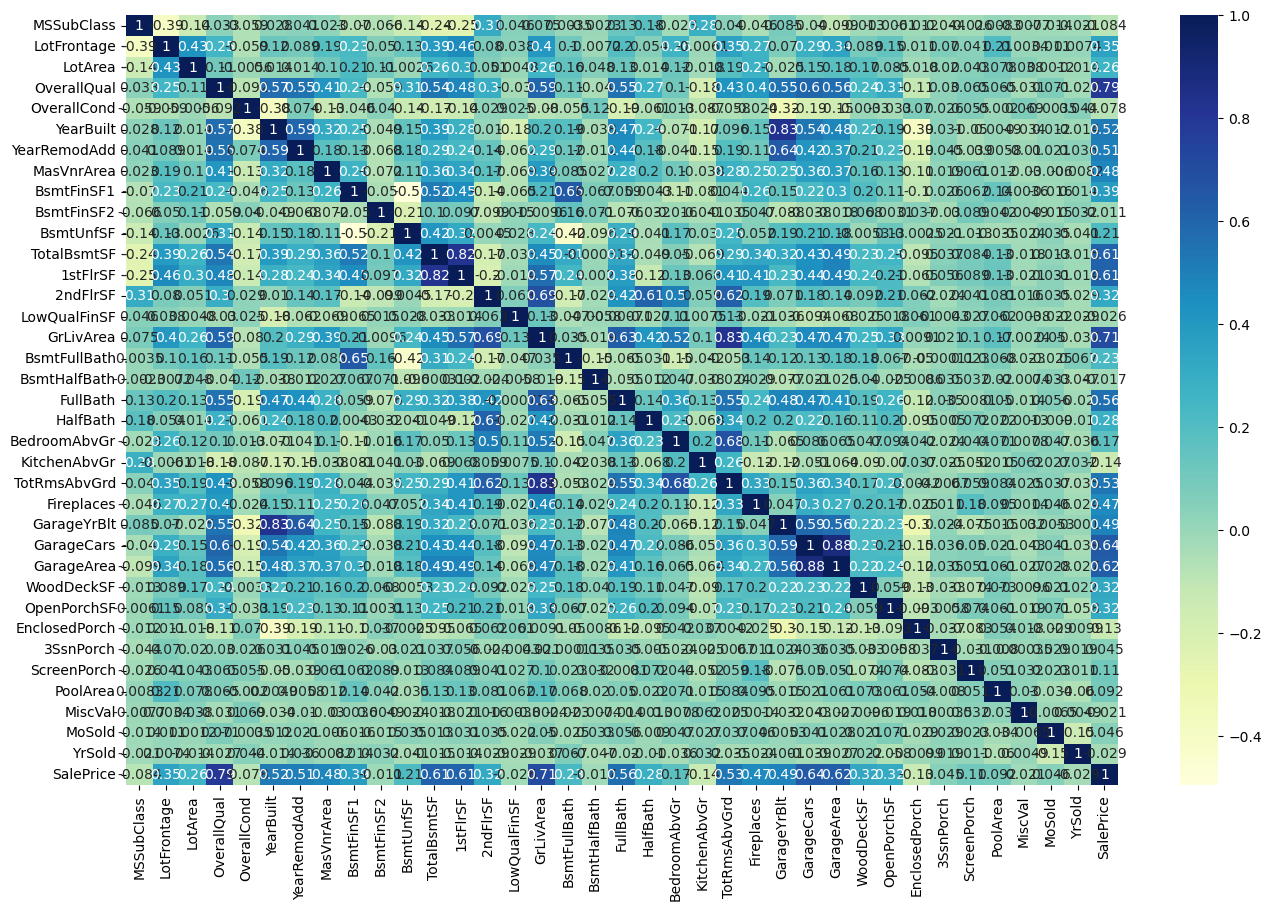

In [19]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,10))

# heatmap
sns.heatmap(housing.corr(), cmap="YlGnBu", annot=True)
plt.show()


The heatmap shows some useful insights:

Correlation of price with independent variables:
- SalePrice is highly (positively) correlated with `OverallQual`, `GrLiveArea`, `GarageCars`, `GarageArea`, `1stFlrSF`, `TotalBsmtSF` and `FullBath`.

- Price is negatively correlated to ```YrSold``` which is normal, as houses in the past were cheaper.

Correlation among independent variables:
- `GrLiveArea` is highly correlated to `TotRmsAbvGr`, `2ndFlrSF`, `FullBath` and `1stFlrSF` descendingly, which is ...
- `1stFlrSF` is highly correlated to `TotalBsmtSF`, which is normal as the basement would be utilizing the full grade area.
- `GarageYrBlt` is highly correlated to `YearBuilt` indicating that a minority of houses were originally built without a garage.
- `GarageCars` is highly correlated to `GarageArea`.


Thus, while building the model, we'll have to pay attention to multicollinearity (especially linear models, such as linear and logistic regression, suffer more from multicollinearity).

## 2. Data Cleaning

Let's now conduct some data cleaning steps. 

We've seen that there are no missing values in the dataset. We've also seen that variables are in the correct format, except ```symboling```, which should rather be a categorical variable (so that dummy variable are created for the categories).

Note that it *can* be used in the model as a numeric variable also. 



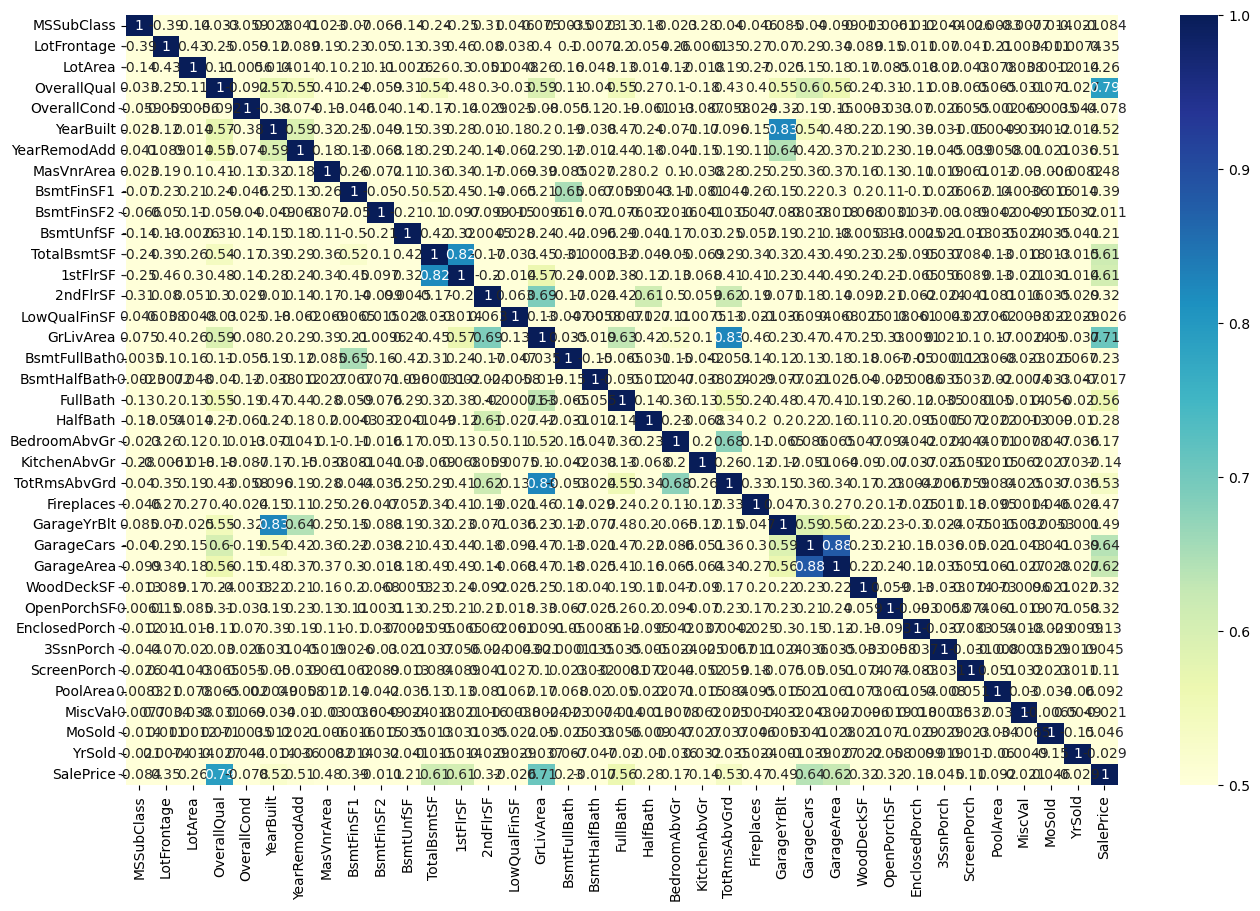

In [20]:
# plotting correlations while highlighting high values

# figure size
plt.figure(figsize=(16,10))

# heatmap
sns.heatmap(housing.corr(), cmap="YlGnBu", annot=True, vmin=0.5)
plt.show()

In [21]:
# variable formats
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

#### Handling NaN Values

In [22]:
housing.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [23]:
#percentage of na values (non zero) in differend columns
col_list = list(housing)
na = []
for i in housing.isna().sum()*100/housing.shape[0]:
    na.append(i)
data = {'columns': col_list, '% na': na}
housing_na = pd.DataFrame(data)
housing_na[housing_na['% na'] != 0]

,columns,% na
2,LotFrontage,17.739726
5,Alley,93.767123
24,MasVnrType,0.547945
25,MasVnrArea,0.547945
29,BsmtQual,2.534247
30,BsmtCond,2.534247
31,BsmtExposure,2.602740
32,BsmtFinType1,2.534247
34,BsmtFinType2,2.602740
41,Electrical,0.068493


In [24]:
# Dropping columns with high percentage of null values, as they're completely irrelevant
housing = housing.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)

housing.shape

(1460, 76)

In [25]:
# 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond' are nan because there is No Garage'. So replacing NANs with it.
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    housing[col].fillna('No Garage', inplace=True)
#
# housing['GarageYrBlt'].fillna(0, inplace=True)

In [26]:
#'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1', 'BsmtCond' are NAN when there is 'No Basement'. So replacing NANs with it
for col in ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1', 'BsmtCond']:
    housing[col].fillna('No Basement', inplace=True)

In [27]:
#percentage of null values (non zero) in differend columns
col_list = list(housing)
na = []
for i in housing.isna().sum()*100/housing.shape[0]:
    na.append(i)
data = {'columns': col_list, '% na': na}
housing_na = pd.DataFrame(data)
housing_na[housing_na['% na'] != 0]

,columns,% na
2,LotFrontage,17.739726
23,MasVnrType,0.547945
24,MasVnrArea,0.547945
40,Electrical,0.068493
55,FireplaceQu,47.260274
57,GarageYrBlt,5.547945


In [28]:
print(housing['MasVnrType'].value_counts())
print('\n')
print(housing['Electrical'].value_counts())
print('\n')
print(housing['FireplaceQu'].value_counts())

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64


In [29]:
#Looks like 'LotFrontage' is an important column. Replace missing values of LotFrontage with Median
housing.loc[:,'LotFrontage'] = housing.loc[:, 'LotFrontage'].fillna(housing['LotFrontage'].median())

# Filling `GarageYearBlt` with median value of years
housing.loc[:,'GarageYrBlt'] = housing.loc[:, 'GarageYrBlt'].fillna(housing['GarageYrBlt'].median())

# Filling `MasVnrArea` NaN values with 0
housing['MasVnrArea'].fillna(0, inplace=True)

# Filling `Electrical` with the most selected value `SBrkr`
housing['Electrical'].fillna('SBrkr', inplace=True)

#Filling the NANs in 'FireplaceQu' with the most frequent value 'No Fireplace'
housing['FireplaceQu'].fillna('No Fireplace', inplace=True)

# Filling `MasVnrType` NaN values with 'None'
housing['MasVnrType'].fillna('None', inplace=True)

In [30]:
#percentage of null values (non zero) in differend columns
col_list = list(housing)
na = []
for i in housing.isna().sum()*100/housing.shape[0]:
    na.append(i)
data = {'columns': col_list, '% na': na}
housing_na = pd.DataFrame(data)
housing_na[housing_na['% na'] != 0]

,columns,% na


In [31]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [32]:
# outliers
housing.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


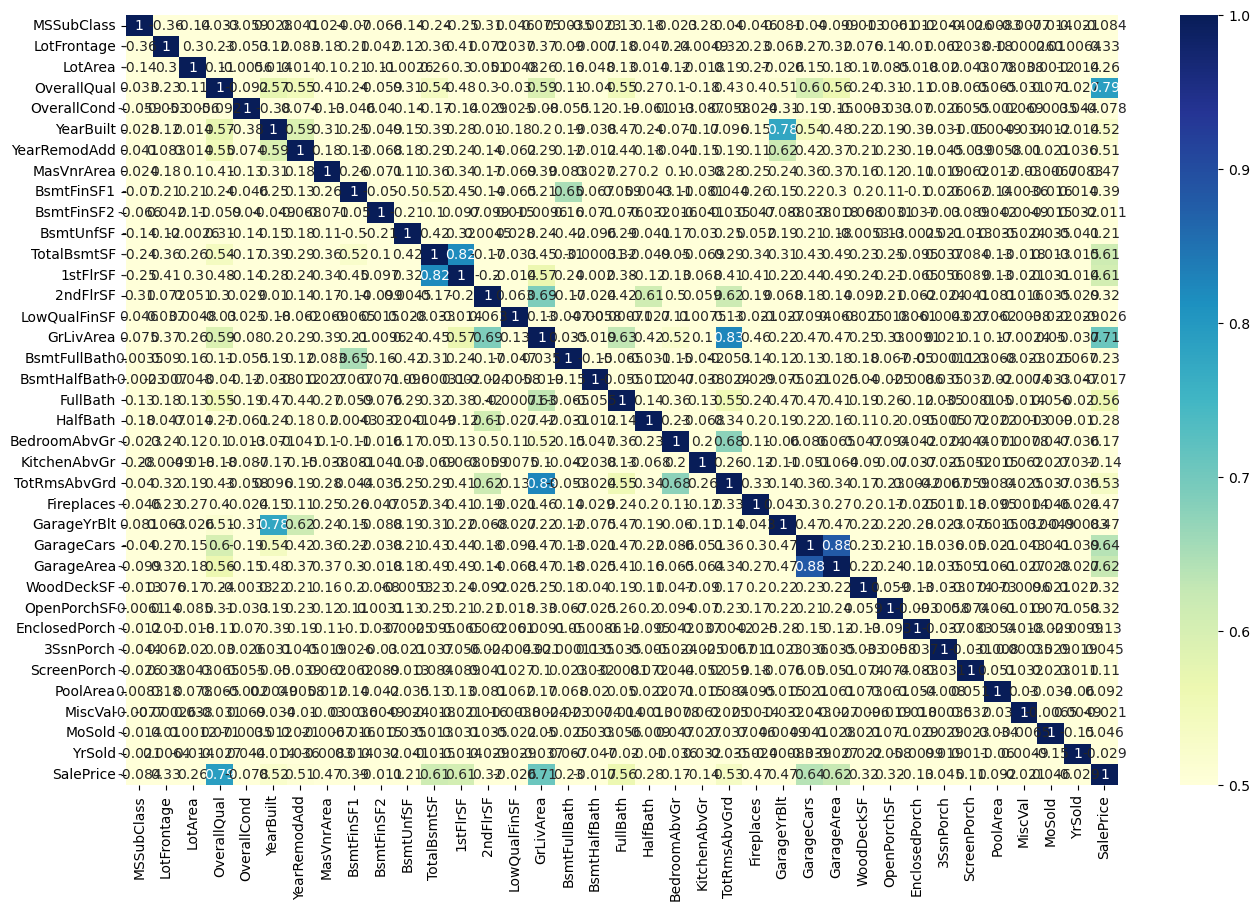

In [33]:
# Re-plotting heatmap after cleaning data to see if there's any changes in correlations

# figure size
plt.figure(figsize=(16,10))

# heatmap
sns.heatmap(housing.corr(), cmap="YlGnBu", annot=True, vmin=0.5)
plt.show()

## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.

In [34]:
housing.select_dtypes(include=['int64', 'float64', 'object']).columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [35]:
# split into X and y
X = housing.loc[:, ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']] # predictors in variable X

y = housing['SalePrice'] # response variable in Y


In [36]:
# creating dummy variables for categorical variables

# subset all categorical variables
housing_categorical = X.select_dtypes(include=['object'])
housing_categorical.head()


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,No Fireplace,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [37]:
# convert into dummies - one hot encoding
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [38]:
# drop categorical variables 
X = X.drop(list(housing_categorical.columns), axis=1)

In [39]:
# concat dummy variables with X
X = pd.concat([X, housing_dummies], axis=1)

In [40]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
#X = pd.DataFrame(scale(X))
#X.columns = cols
#X.columns
X[cols] = scaler.fit_transform(X[cols])
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [41]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [42]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [43]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

## 3. Model Building and Evaluation

## Linear Regression

Let's now try predicting car prices, a dataset using linear regression.

In [44]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [45]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-50344242786757.62
[-9.41271502e+02  2.01545480e+03  7.09015437e+03  8.92063654e+03
  6.54397403e+03  1.26987039e+04  2.30974204e+03  3.75636105e+03
 -1.92835896e+16 -6.82049479e+15 -1.86819046e+16  1.85482325e+16
 -1.18457192e+16 -1.33759889e+16 -1.48989560e+15  1.61016309e+16
  9.55305024e+02 -1.58282213e+02  1.42688203e+02 -1.83095314e+03
 -3.06612844e+03 -3.49817723e+03 -8.93014313e+02  2.34792671e+03
  1.19248110e+03  3.32503160e+03  1.68287342e+03  1.17715605e+03
  1.24452005e+03 -4.01927274e+02  5.92457965e+02  6.88321921e+02
  4.17146317e+03  3.12500000e+02 -4.10500000e+02 -8.33687500e+02
  5.50550000e+03  2.73425000e+03  1.10397500e+04  7.86437500e+03
  2.02162500e+03 -1.85000000e+02  2.52968750e+01  6.90000000e+02
  3.79750000e+02 -1.33850000e+03  1.22600000e+03 -1.14343750e+02
  2.41618750e+03 -1.08425000e+03  2.42500000e+02  7.20312500e+00
  8.44331055e+02 -2.85300000e+03  6.34750000e+02  6.54000000e+02
  1.53000000e+03 -8.55000000e+02 -8.08000000e+02  4.65900000e+03
 -1.73

In [46]:
from sklearn.metrics import r2_score, mean_squared_error

In [47]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9492997895094226
-1.6080862748268765e+21
323502772210.46173
4.5327329327388847e+33
316848944.378513
1.0348705325887866e+31


## Ridge and Lasso Regression

Let's now try predicting house prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [48]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5,
 1.0, 2.0, 5.0, 10.0, 20, 50, 100, 200, 500, 1000]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 1.0, 2.0,
                                   5.0, 10.0, 20, 50, 100, 200, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [49]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 200}


In [50]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 200
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-3.64901228e+03 -1.92849289e+02  3.57039132e+03  1.04500145e+04
  3.62547199e+03  2.48207845e+03  3.21758999e+03  3.94884332e+03
  2.12153108e+03  9.65594386e+02  9.09157046e+02  3.47641487e+03
  6.11104867e+03  7.34700931e+03 -6.95981323e+02  1.05347305e+04
  3.02329729e+03  2.66212732e+02  4.32149887e+03  1.66127289e+03
 -5.00205085e+02 -2.27956629e+03  3.91977720e+03  2.59156926e+03
  5.23491144e+02  5.62837049e+03  2.34674782e+03  1.63739673e+03
  9.15206580e+02  9.59702140e+01  9.96662472e+02  1.20694949e+03
  8.75785816e+01  3.38331530e+00 -2.87786531e+02 -6.80951626e+02
  8.45674551e+02  2.91430513e+02  1.54291862e+03 -2.32662837e+02
  1.17203211e+03  1.94542165e+02 -2.60226653e+03  8.40557004e+01
  1.85769759e+03  6.01825764e+02  2.51588863e+03 -9.01673038e+02
  2.52100709e+03 -1.46012752e+03 -6.11437719e+02 -4.05489314e+02
  8.48170430e+02 -6.41668612e+01 -7.28728937e+01 -2.83008406e+02
 -8.45796936e+01  1.23433831e+02 -9.47912692e+02  3.65126054e+03
 -3.49437483e+03 -1.42633

In [51]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_ridge_train = ridge.predict(X_train)
y_pred_ridge_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_ridge_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_ridge_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_ridge_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_ridge_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_ridge_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_ridge_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9042478893781029
0.8591934275748071
610965377292.5347
396893250050.57104
598398998.3276539
906148972.7181988


## Lasso

In [83]:
lasso = Lasso()

# cross validation
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(X_train, y_train) 

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 1.0, 2.0,
                                   5.0, 10.0, 20, 50, 100, 200, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [89]:
# Printing the best hyperparameter alpha
print(model_cv_lasso.best_params_)

{'alpha': 500}


In [54]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha = 500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=500)

In [55]:
lasso.coef_

array([-6.15321308e+03, -0.00000000e+00,  3.94354297e+03,  1.32059784e+04,
        4.66168939e+03,  6.94873940e+03,  3.17873361e+03,  2.99451459e+03,
        2.41997749e+03,  0.00000000e+00, -0.00000000e+00,  4.82041268e+03,
        0.00000000e+00,  4.43813927e+02, -1.85109700e+03,  2.97374744e+04,
        3.35252622e+03,  0.00000000e+00,  1.94749331e+03,  0.00000000e+00,
       -1.40906264e+03, -2.76643950e+03,  0.00000000e+00,  1.21593430e+03,
        9.16386500e+01,  6.35486540e+03,  0.00000000e+00,  9.31438721e+02,
        2.90613031e+02, -0.00000000e+00,  4.17933719e+02,  5.70250138e+02,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -1.68629146e+01,
        0.00000000e+00,  0.00000000e+00,  1.61290580e+03, -0.00000000e+00,
        1.03893121e+03,  0.00000000e+00, -1.55001970e+03,  0.00000000e+00,
        2.66154895e+02,  0.00000000e+00,  7.74875550e+02, -5.69963123e+02,
        2.21219077e+03, -7.18016280e+02, -3.51356206e+01,  0.00000000e+00,
        0.00000000e+00,  

In [56]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_lasso_train = lasso.predict(X_train)
y_pred_lasso_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_lasso_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_lasso_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_lasso_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_lasso_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_lasso_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_lasso_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9237615170331128
0.8444495311143874
486454796740.7695
438452055749.7437
476449360.17705137
1001032090.7528396


Error Distribution in Train dataset


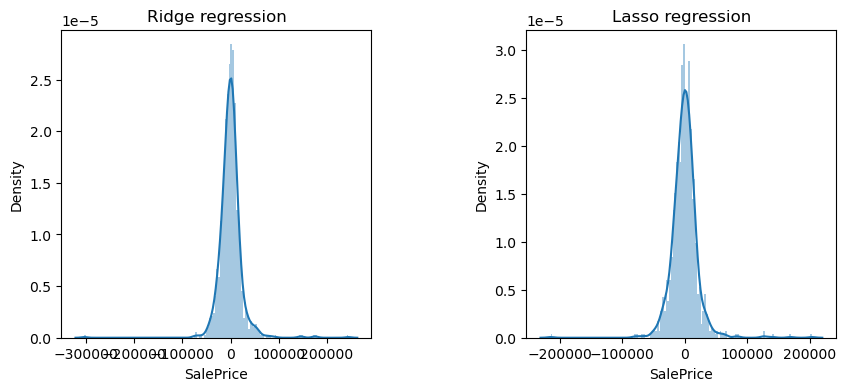

In [90]:
print('Error Distribution in Train dataset')
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
sns.distplot((y_train - y_pred_ridge_train), bins = 150)
plt.title('Ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_train - y_pred_lasso_train), bins = 150)
plt.title('Lasso regression')

plt.subplots_adjust(wspace = .5)

Error Distribution in Test dataset


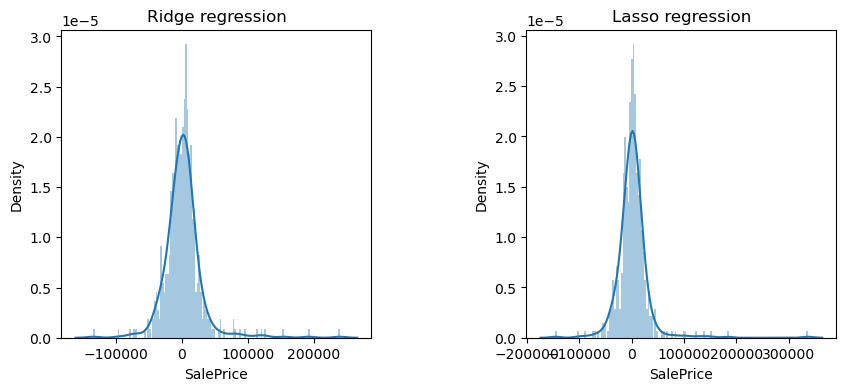

In [58]:
print('Error Distribution in Test dataset')
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
sns.distplot((y_test - y_pred_ridge_test), bins = 150)
plt.title('Ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_test - y_pred_lasso_test), bins = 150)
plt.title('Lasso regression')

plt.subplots_adjust(wspace = .5)

In [59]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.492998e-01,9.042479e-01,9.237615e-01
1,R2 Score (Test),-1.608086e+21,8.591934e-01,8.444495e-01
2,RSS (Train),3.235028e+11,6.109654e+11,4.864548e+11
3,RSS (Test),4.532733e+33,3.968933e+11,4.384521e+11
4,MSE (Train),1.780025e+04,2.446220e+04,2.182772e+04
5,MSE (Test),3.216940e+15,3.010231e+04,3.163909e+04


## Lets observe the changes in the coefficients after regularization

In [60]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [61]:
pd.set_option('display.max_rows', None)
betas.head(80)

,Linear,Ridge,Lasso
MSSubClass,-9.412715e+02,-3649.012283,-6153.213078
LotFrontage,2.015455e+03,-192.849289,-0.000000
LotArea,7.090154e+03,3570.391324,3943.542973
OverallQual,8.920637e+03,10450.014545,13205.978404
OverallCond,6.543974e+03,3625.471993,4661.689394
YearBuilt,1.269870e+04,2482.078453,6948.739404
YearRemodAdd,2.309742e+03,3217.589990,3178.733606
MasVnrArea,3.756361e+03,3948.843320,2994.514595
BsmtFinSF1,-1.928359e+16,2121.531075,2419.977486
BsmtFinSF2,-6.820495e+15,965.594386,0.000000


In [62]:
# Features selected by Lasso
features = betas[betas['Lasso'] != 0]
print('Total features are', betas.shape[0])
print('Lasso has selected', betas.shape[0] - features.shape[0], 'featuers')
print('Lasso has dropped', features.shape[0], 'features')

Total features are 246
Lasso has selected 118 featuers
Lasso has dropped 128 features


## Conclusion :

In [63]:
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.492998e-01,9.042479e-01,9.237615e-01
1,R2 Score (Test),-1.608086e+21,8.591934e-01,8.444495e-01
2,RSS (Train),3.235028e+11,6.109654e+11,4.864548e+11
3,RSS (Test),4.532733e+33,3.968933e+11,4.384521e+11
4,MSE (Train),1.780025e+04,2.446220e+04,2.182772e+04
5,MSE (Test),3.216940e+15,3.010231e+04,3.163909e+04


### R2 Score between Ridge and Lasso

- Ridge : Train :90.4    Test :85.9
- Lasso : Train :92.3    Test :84.4


### Top 5 most significant variables in Ridge are:

In [64]:
betas['Ridge'].sort_values(ascending=False).head(5)

GrLivArea               10534.730475
OverallQual             10450.014545
2ndFlrSF                 7347.009310
RoofMatl_WdShngl         7231.974776
Neighborhood_NoRidge     6892.484145
Name: Ridge, dtype: float64

### Top 5 most significant variables in Lasso are:

In [65]:
betas['Lasso'].sort_values(ascending=False).head(5)

RoofMatl_CompShg    32722.709855
GrLivArea           29737.474373
RoofMatl_WdShngl    20224.204921
RoofMatl_Tar&Grv    20030.873653
RoofMatl_WdShake    13766.132756
Name: Lasso, dtype: float64

- Optimal Value of lamda for ridge : 200
- Optimal Value of lamda for Lasso : 500